# Теория информации

## Определения

Пространство событий $\quad I = \{ i_1, ... i_m \}$

Событие (случайная величина) $\quad U: (\Omega, \mathcal{F}, \mathbb{P}) \to I$

Вероятностное распределение событий $\quad p_j = \mathbb{P}(U = i_j)$

Алфавит кодера $\quad J = \{0, ..., q-1\}$

Код $\quad f: I \to \cup_{n \geq 1}   J^n, i_j \mapsto x_1...x_{s_j}$

Кодовое слово события $i_j \quad$ $x_1...x_{s_j} = f(i_j)$

Длина $s_j$ кодового слова $x_1...x_{s_j}$

Длина (с.в.) $S$ случайного кодового слова $f(U)$

Средняя длина кодового слова $\mathbb{E}[S] = \sum \limits_{j=1}^m p_j s_j$

Энтропия распределения $\quad H_q(p_1, ... p_m) = \sum \limits_{j=1}^m p_j ( -\log_q p_j)$

Кросс-энтропия $\quad CE(p|p') = \sum \limits_{j=1}^m p_j ( -\log_q p'_j)$

KL-дивергенция $\quad D_{KL} (p|p') = CE(p|p') - H(p)$






## Пример

In [ ]:
from IPython.display import Image

In [ ]:
img_url = 'https://cdn.shopify.com/s/files/1/1014/5789/files/Standard-ASCII-Table_large.jpg?10669400161723642407'
Image(url=img_url, width=400, height=300)

$I = \{i_1, ... i_m \} = \{ \text{NULL}, ..., \sim, \text{DEL} \}$ - множество символов клавиатуры

$U: (\Omega, \mathcal{F}, \mathbb{P}) \to I$ - случайный символ клавиатуры

$p_j = \mathbb{P}(U = i_j)$ - частота использования символа $i_j$

$J = \{0,1,2,...9, \text{A,B,C,D,F} \}$ - алфавит кодера

$f: i_j \in I \to x_1 ... x_{s_j} \in \cup_{n \geq 1}   J^n$ - кодирование символа $i_j$ клавиатуры бинарным кодом $x_1 ... x_{s_j}$

$f(+) = 2\text{B}$



## Мотивация

$l(\theta) = \ln p_{\theta}(\hat{X})$ - правдободобие для фиксированно выборки $\hat{X} = \{ \hat{X}_1, ... \hat{X}_n \}$

Выборка $\hat{X} = \{ \hat{X}_1, ... \hat{X}_n \}$ - это реализация случайной величины $X = \{X_1, ..., X_n \} \sim p_{\theta_0}(x_1, ..., x_n)$

$\tilde{l}(\theta, X) = \ln p_{\theta}(X)$ - правдободобие для случайной выборки $X = \{X_1, ..., X_n \}$

$\mathbb{E}_{X \sim p_{\theta_0}} \tilde{l}(\theta, X) = \int p_{\theta_0}(x) \ln p_{\theta}(x) dx = - CE(p_{\theta_0} | p_{\theta})$

Таким образом, в контексте метода максимального правдоподобия возникает понятие кросс-энтропии

## Задача 1 (минимальная средняя длина)

$I = \{A, B, C, D\}$

$p = \{ \frac12,\frac14, \frac18, \frac18 \}$

$J = \{0,1\}$

**Найти среднюю длину оптимального кода**

Т.е., найти наименьшие $s_1, ... s_n$, такие, для которых существует $f: I \to \cup_{n \geq 1}   J^n$ со следующем условием: символ $i_j$ кодируется строкой длины $s_j$.

$q = 2$



$\min \limits_{s1, ..., s_m} \mathbb{E}[S] = \min \limits_{s1, ..., s_m} \sum \limits_{j=1}^m p_j s_j \quad \text{s.t.} \quad \sum \limits_{j=1}^m  q^{-s_j} \leq 1$

Это задача условной оптимизации по целочисленным переменным. Решим ее методом мноителей Лагранжа https://en.wikipedia.org/wiki/Lagrange_multiplier

### Решение

$\min \limits_{s_1, ..., s_m \in \mathbb{Z}_{+}} \mathbb{E}[S] = \min \limits_{s_1, ..., s_m \in \mathbb{Z}_{+}} \sum \limits_{j=1}^m p_j s_j \quad \text{s.t.} \quad \sum \limits_{j=1}^m  q^{-s_j} \leq 1$

**Релаксация** (переход к нецелым переменным)

$\min \limits_{\tilde{s}_1, ..., \tilde{s}_m \in \mathbb{R}_{+}} \mathbb{E}[\tilde{S}] = \min \limits_{\tilde{s}_1, ..., \tilde{s}_m \in \mathbb{R}_{+}} \sum \limits_{j=1}^m p_j \tilde{s}_j \quad \text{s.t.} \quad \sum \limits_{j=1}^m  q^{-\tilde{s}_j} \leq 1$

**Метод множителей Лагранжа** (минимум линейной функции достигает на границе множества ограничений)

$\min \limits_{\tilde{s}_1, ..., \tilde{s}_m \in \mathbb{R}_{+}} \mathbb{E}[\tilde{S}] = \min \limits_{\tilde{s}_1, ..., \tilde{s}_m \in \mathbb{R}_{+}} \sum \limits_{j=1}^m p_j \tilde{s}_j  \quad \text{s.t.} \quad 1 - \sum \limits_{j=1}^m  q^{-\tilde{s}_j} = 0$

$L = \sum \limits_{j=1}^m p_j \tilde{s}_j + \lambda \bigl( 1 - \sum \limits_{j=1}^m q^{-\tilde{s}_i} \bigr) = \sum \limits_{j=1}^m p_j \tilde{s}_j + \lambda \bigl( 1 - \sum \limits_{j=1}^m e^{-\tilde{s}_i \ln q} \bigr)$

Решение задачи

Решение удовлетворяет системе уравнений $L'_{\tilde{s}_i}=0, \; L'_{\lambda} = 0$

$L'_{\tilde{s}_i} = p_i + \lambda e^{-\tilde{s}_i \ln q}\ln q = p_i + \lambda q^{-\tilde{s}_i}\ln q = 0$

$q^{-\tilde{s}_i} = p_i [ - \lambda \ln q]$

$\tilde{s}_i = - \log_q p_i + \log_q[- \lambda \ln q]$

$L'_{\lambda} = 1 - \sum \limits_{j=1}^m q^{-\tilde{s}_i} = 1 - \sum \limits_{j=1}^m p_i [- \lambda \ln q]^{-1} = 1 - [-\lambda \ln q]^{-1}= 0$

$-\lambda \ln q =  1$

$\tilde{s}_i^{\ast} = - \log_q p_i + \log_q[-\lambda \ln q] =  - \log_q p_i$

**Оптимальные длины кодовых слов**

$\tilde{s}_i^{\ast} = - \log_q p_i$

$s_i^{\ast} = [ - \log_q p_i ]$



**Подставим числа**

$\min \limits_{s_1, s_2, s_3, s_4} \mathbb{E}[S] = \min \limits_{s_1, s_2, s_3, s_4} p_1 s_1 + p_2 s_2 + p_3 s_3 + p_4 s_4 \quad \text{s.t.} \quad 2^{-s_1} + 2^{-s_2} + 2^{-s_3} + 2^{-s_4} \leq 1$

$s_1 = - \log_{2} \frac{1}{2} = 1$

$s_2 = - \log_{2} \frac{1}{4} = 2$

$s_3 = - \log_{2} \frac{1}{8} = 3$

$s_4 = - \log_{2} \frac{1}{8} = 3$

$ \mathbb{E}[S] = \frac{1}{2} 1 + \frac{1}{4} 2 + \frac{1}{8} 3 + \frac{1}{8} 3 = 1 \frac{6}{8}$

## Энтропия

Энтропия дискретного распределения $\quad H_q(p_1, ... p_m) = \sum \limits_{j=1}^m p_j ( -\log_q p_j) = \sum \limits_{j=1}^m p_j \tilde{s}_j^{\ast} = \mathbb{E} \tilde{S}^{\ast}$

Энтропия непрерывного распределения  $\quad H(p) = \int p(x) \ln p(x) dx$

## Теорема Шеннона

$H_q(p) \leq \min \limits_{s_j} \mathbb{E}[S] \leq H_q(p) + 1$

Эквивалентно,

$\sum \limits_{j=1}^m p_j ( -\log_q p_j) \leq \sum \limits_{j=1}^m p_j s_j^* \leq \sum \limits_{j=1}^m p_j ( -\log_q p_j) + 1$

Или более сильное утверждение,

$ -\log_q p_j \leq  s_j^* \leq -\log_q p_j + 1$

**Доказательство**

Релаксируем задачу $\min \limits_{s1, ..., s_m} \mathbb{E}[S] \, \text{s.t.} \sum \limits_{j=1}^m  q^{-s_j} \leq 1$ на непрерывные переменные $\tilde{s}_1, ... \tilde{s}_m$.

Решение методом Лагранжа дает $\tilde{s}_j^* = - \log_q p_j$.

Взяв ближашие целые решения, получим $ -\log_q p_j \leq  s_j^* \leq -\log_q p_j + 1$.




**Интерпретация энтропии**

Энтропия - это оценка средней длины оптимального кода

## Неравенство Крафта

$\exists f \text{с длинами } s_j \iff \sum \limits_{j=1}^m  q^{-s_j} \leq 1$

**Пояснение смысла неравенства**

По теореме Шеннона (см. доказательство) $ -\log_q p_j \leq  s_j^* \leq -\log_q p_j + 1$.

Левое неравенство эквивалентно $q^{-s^*_j} \leq p_j$.

Просуммировав по $j$, получим $\sum \limits_{j=1}^m  q^{-s^*_j} \leq 1$.


## Кросс-энтропия

Код $f : I \to \cup_{n \geq 1}   J^n$ является оптимальным для распределения $p$ на $I$.

Код $f' : I \to \cup_{n \geq 1}   J^n$ является оптимальным для распределения $p'$ на $I$.

Пусть $p$ - истинное распределение событий $I$, а $p'$ - ошибочное.

Тогда энтропия $H_q(p) = \sum \limits_{j=1}^m p_j ( -\log_q p_j)$ оценивает длину оптимального кода $f$, построенного по истинному распределению, а кросс-энтропия
$CE(p|p') = \sum \limits_{j=1}^m p_j ( -\log_q p'_j)$ оценивает длину ошибочного кода $f'$.

$CE(p|p') \leq \min \limits_{s'_j} \mathbb{E}[S'] \leq CE(p|p')  + 1$, где $S'$ - длина случайного кодового слова в кодировке $f'$, при этом вероятность случайного слова соответствует истинному распределению $p$

**Доказательство**

$  -\log_q p'_j \leq  s_j^{' \ast} \leq  -\log_q p'_j + 1$.

$\sum \limits_{j=1}^m p_j ( -\log_q p'_j) \leq \sum \limits_{j=1}^m p_j s_j^{' \ast} \leq  \sum \limits_{j=1}^m p_j ( -\log_q p'_j) + 1$

## Задача 2 (код Хаффмана)

1. Построить оптимальный код (код Хаффмана) для $I = \{A, B, C, D\}$ и следующих вероятностей на $I$ : $p = \{ \frac12,\frac14, \frac18, \frac18 \}$, $p'$ равномерная.

2. Посчитать соответствующие средние длины кодовых слов для $p$ и $p'$.

3. Посчитать энтропиии для $p$ и $p'$.

4. Посчитать кросс-энтропию $CE(p' | p)$ и $CE(p | p')$.

### Решение

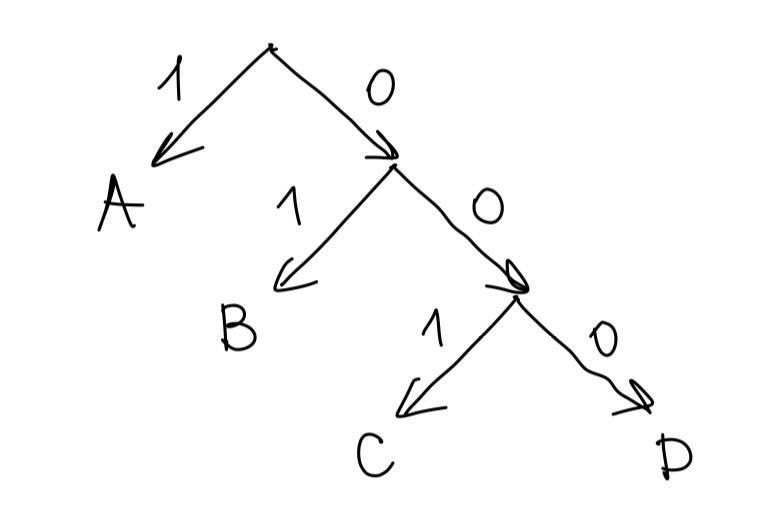

$p = \{ \frac12,\frac14, \frac18, \frac18 \}$

$f(A) = 1, s_A = 1$

$f(B) = 01, s_B = 2$

$f(C) = 001, s_C = 3$

$f(D) = 000, s_D = 3$

$\mathbb{E}S = p_A s_A + p_B s_B + p_C s_C + p_D s_D = \frac12 1 + \frac14 2 + \frac18 3 + \frac18 3 = 1 \frac68  $

$H_2( \frac12,\frac14, \frac18, \frac18) = - p_A \log_2 p_A - p_B \log_2 p_B - p_C \log_2 p_C - p_D \log_2 p_D  = - \frac12 \log_2\frac12 - \frac14 \log_2\frac14 - \frac18 \log_2\frac18 - \frac18 \log_2\frac18 = 1 \frac68 $   

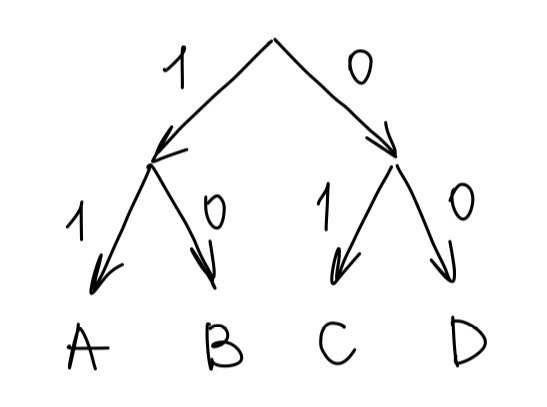

$p' = \{ \frac14,\frac14, \frac14, \frac14 \}$

$f(A) = 11, s_A = 2$

$f(B) = 10, s_B = 2$

$f(C) = 01, s_C = 2$

$f(D) = 00, s_D = 2$

$\mathbb{E}S = p'_A s_A + p'_B s_B + p'_C s_C + p'_D s_D = \frac14 2 + \frac14 2 + \frac14 2 + \frac14 2 = 2 $

$H_2( \frac12,\frac12, \frac12, \frac12) = - p'_A \log p'_A - p'_B \log_2 p'_B - p'_C \log_2 p'_C - p'_D \log_2 p'_D  = - \frac14 \log_2\frac14 - \frac14 \log_2\frac14 - \frac14 \log_2\frac14 - \frac14 \log_2\frac14 = 2 $   

$CE(p' | p) = - p'_A \log_2 p_A - p'_B \log_2 p_B - p'_C \log_2 p_C - p'_D \log_2 p_D = - \frac14 \log_2 \frac12 - \frac14 \log_2 \frac14 - \frac14 \log_2 \frac18 - \frac14 \log_2 \frac18 = \frac14 (1 + 2 + 3 + 3) = 2 \frac14$

$CE(p | p') = - p_A \log_2 p'_A - p_B \log_2 p'_B - p_C \log_2 p'_C - p_D \log_2 p'_D = - \frac12 \log_2 \frac14 - \frac14 \log_2 \frac14 - \frac18 \log_2 \frac14 - \frac18 \log_2 \frac14 = 2$


## Задача 3 (свойства кросс-энтропии)

Доказать

1. $CE(p|p) = H_q(p)$

2. $CE(p|p') \geq H_q(p)$

### Решение

1. $CE(p|p) = \sum \limits_{j=1}^m p_j ( -\log_q p_j) = H_q(p)$

2. Пусть носители $p$ и $p'$ совпадают, то есть $p_j \neq 0, p'_j \neq 0$

$CE(p|p') - H_q(p) = \sum \limits_{j=1}^m p_j ( -\log_q p'_j) - \sum \limits_{j=1}^m p_j ( -\log_q p_j) = \sum \limits_{j=1}^m p_j ( -\log_q \frac{p'_j}{p_j}) \geq - \log_q (\sum \limits_{j=1}^m p_j \frac{p'_j}{p_j} ) = $

$= - \log_q  (\sum \limits_{j=1}^m p'_j) = - \log_q 1 = 0$

## Задача 4 (энтропия равномерного распределения)

$p = U\{1,2,...,m \}$ - равномерное распределение на дискретном множестве

1. Найти $H_q(p)$

2. Доказать $H_q(p) \geq H_q(p')$, где $p'$ - любое распределение на том же дискретном множестве

### Решение

$p_j = \frac{1}{m}$

1. $H_q(p_1, ... p_m) = \sum_{j=1}^m p_j (- \log_q p_j) = m \frac{1}{m} (- \log_q \frac{1}{m}) = - \log_q m$

2. Используем свойство $CE(p'| p) \geq H_q(p')$

$CE(p'| p) = \sum_{j=1}^m p'_j (- \log_q p_j)= - \sum_{j=1}^m p'_j \log_q \frac{1}{m} =  - \log_q m $

$H(p) = CE(p'| p) \geq H_q(p')$



## Задача 5 (энтропия нормального распределения)

Доказать, что распределение $\mathcal{N}(\mu, \sigma^2)$ обладает максимальной энтропией в классе непрерывных распределений с матожиданием $\mu$ и дисперсией $\sigma^2$.

### Решение

$p = \mathcal{N}(\mu, \sigma^2) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \bigl[ - \frac{(x - \mu)^2}{2 \sigma^2}\bigr]$

$p'$ такое, что $\int x p'(x) dx = \mu$, $\int (x - \mu)^2 p'(x) dx = \sigma^2$

1. $H(p) = - \int p(x) ln [p(x)]  dx =  - \int p(x) [ln \frac{1}{\sqrt{2 \pi} \sigma} - \frac{(x - \mu)^2}{2 \sigma^2}] dx = - ln \frac{1}{\sqrt{2 \pi} \sigma} + \frac{1}{2 \sigma^2} \int (x - \mu)^2 p(x) dx =  - ln \frac{1}{\sqrt{2 \pi} \sigma} + \frac{1}{2}$

2. Используем свойство $CE(p'| p) \geq H_q(p')$

$CE(p'|p) = - \int p'(x) ln [p(x)]  dx = - \int p'(x) [ln \frac{1}{\sqrt{2 \pi} \sigma} - \frac{(x - \mu)^2}{2 \sigma^2}] dx = - ln \frac{1}{\sqrt{2 \pi} \sigma} + \frac{1}{2 \sigma^2} \int p'(x) (x - \mu)^2 dx = - ln \frac{1}{\sqrt{2 \pi} \sigma} + \frac{1}{2}$

$H(p) = CE(p'|p) \geq H(p')$

## KL-дивергенция

$D_{KL} (p|p')= CE(p|p') - H(p) \geq 0 $